In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [2]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', sep=' ', header=None)

In [3]:
df_train_data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [4]:
df_train_data.loc[df_train_data[9] != 4,9] = 0
df_train_data.loc[df_train_data[9] == 4,9] = 1

X = df_train_data.drop([9], axis=1)
y = df_train_data[9]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=82)
print(X_train.shape[0], X_test.shape[0])

10875 3625


In [6]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
lr.score(X_train, y_train)

0.8235402298850575

In [8]:
#Calculate the Score
lr.score(X_test, y_test)

0.8215172413793104

In [9]:
#Dummy Classifier - Dummest model we can predict, predict one(1) for any input
#Is my machine learning model better if I only did one.
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

In [10]:
#Confusion Matrix

predict = lr.predict(X_test)

conf = confusion_matrix(y_test, predict)
print(conf)

[[2950  142]
 [ 505   28]]


In [11]:
#Plot Confusiuon Matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [12]:
#plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [13]:
#Calculate Metrics
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
fbeta_precision = fbeta_score(y_test, predict, 0.5)
fbeta_recall = fbeta_score(y_test, predict, 2)

print('Accuracy Score: {}'.format(accuracy))
print('Precision Score: {}'.format(precision))
print('Recall Score: {}'.format(recall))
print('F1 Score: {}'.format(f1))
print('Fbeda score favoring precision: {}'.format(fbeta_precision))
print('Fbeda score favoring recall: {}'.format(fbeta_recall))

Accuracy Score: 0.8215172413793104
Precision Score: 0.16470588235294117
Recall Score: 0.0525328330206379
F1 Score: 0.07965860597439545
Fbeda score favoring precision: 0.11541632316570487
Fbeda score favoring recall: 0.060816681146828845


In [14]:
#Print a classification report
class_report = classification_report(y_test, predict, target_names=['Not Space', 'Space'])
print(class_report)

              precision    recall  f1-score   support

   Not Space       0.85      0.95      0.90      3092
       Space       0.16      0.05      0.08       533

    accuracy                           0.82      3625
   macro avg       0.51      0.50      0.49      3625
weighted avg       0.75      0.82      0.78      3625



[0.04592497 1.        ]
[0.05253283 1.        ]
[1 0]


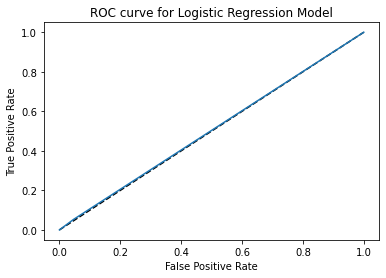

In [15]:
#Print ROC curve
probs = lr.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

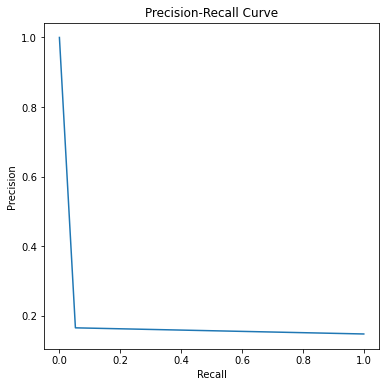

In [16]:
pres, rec, thresholds = precision_recall_curve(y_test, predict)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [17]:
#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.82482759 0.83264368 0.83310345 0.83724138 0.83586207]
Mean cross validatiion score: 0.8327356321839081


In [18]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=20, random_state=40)